W sytuacji gdy budujemy model klasyfikacji, który poza zwracaną klasą daje nam do dyspozycji prawdopodobieństwo przynależenia do danej kategorii (np. funkcja _predict_proba()_), możemy ocenić te prawdopodobieństwa. Na pierwszy ogień idzie wykres podwójnej gęstości (w przypadku problemu niebinaronego można pobawić się w wykresy OvR dla każdej kategorii lub OvO ale tutaj wygenerujemy bardzo dużą liczbę wykresów co może być nieczytelne)

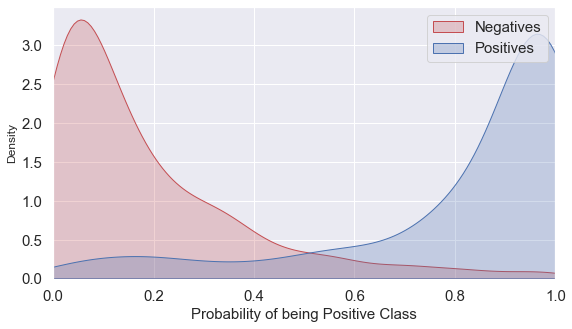

In [61]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=2, shuffle=False)
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0, solver='lbfgs', max_iter=10)
lr.fit(X, y)

prediction=lr.predict_proba(X)[:,1]


sns.set(style="darkgrid")
plt.figure(figsize=(9,5))

fig = sns.kdeplot(prediction[y==0], label='Negatives', shade=True, color="r", common_grid=True)
fig = sns.kdeplot(prediction[y==1], label='Positives', shade=True, color="b", common_grid=True)

plt.xlabel('Probability of being Positive Class', fontsize=15)
plt.xlim(0,1)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.savefig("double_density.png", format='png', dpi=300, facecolor="White")
plt.show()


Druga metoda, korzystam z arkumentu hue

(0.0, 1.0)

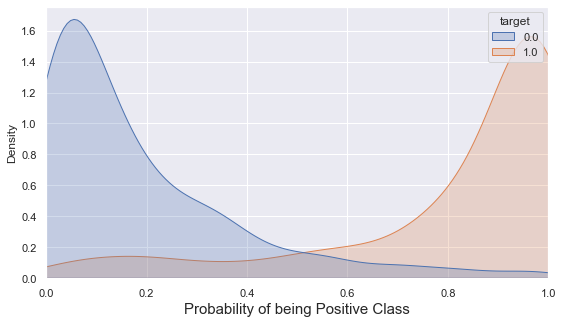

In [60]:
import pandas as pd
data =  np.array([list(prediction),list(y)]).T
df = pd.DataFrame(data = data, columns=["pred", "target"])

plt.figure(figsize=(9,5))
sns.kdeplot(data = df, x="pred",  shade=True, color=["b","r"], hue="target")
plt.xlabel('Probability of being Positive Class', fontsize=15)
plt.xlim(0,1)
#warto zauważyć, że w tym przypadku rozkład prawdopodobieństw jest w odniesieniu do całej bazy przez co liczności są 2x mniejsze!!

In [72]:
import numpy as np

def ylogy(y, py):
    logpy = [0 if x <= 0 else np.log(x) for x in py]
    out = [i1 * i2 for i1, i2 in zip(y, logpy)]
    return out

#tutaj korzystam z rozbicia sumy, na dwie sumy, inaczej musiałbym najpierw zzipować wnętrze
np.sum(ylogy(y, prediction)  ) + np.sum(ylogy(1-y, 1-prediction))


-305.65673894916597

In [70]:
np.sum(ylogy(y, prediction))

array([9.74424717e-02, 2.38628619e-01, 2.14740021e-02, 4.34289309e-02,
       3.63840379e-02, 7.20689975e-01, 4.47486054e-02, 8.92857742e-02,
       3.60080704e-01, 9.14248798e-02, 7.74998818e-02, 6.50795305e-02,
       9.21955434e-02, 2.91582645e-02, 6.01951155e-02, 6.07358524e-01,
       4.41933242e-02, 4.62348132e-01, 6.56334906e-02, 2.11894762e-01,
       2.13410418e-01, 2.68653422e-01, 2.01991666e-01, 1.83576960e-01,
       9.90570345e-02, 1.54921318e-01, 1.08885107e-01, 4.12487702e-01,
       1.56434798e-01, 2.03232716e-02, 9.44136286e-02, 2.07206723e-01,
       5.57338922e-02, 1.87986410e-02, 2.95026698e-01, 2.20634336e-01,
       1.43027742e-01, 3.32756375e-01, 3.64729134e-02, 2.18338507e-02,
       1.15742863e-01, 4.58762359e-01, 2.84644186e-02, 5.65609280e-01,
       1.51372435e-01, 2.99604924e-01, 4.28066065e-01, 1.62414791e-01,
       1.30652901e-01, 2.59993528e-02, 2.86405754e-01, 1.16970793e-01,
       7.13346390e-01, 3.94649026e-01, 5.55385541e-02, 8.28473076e-02,
      